# A Non-Linear Pendulum #

In [1]:
# following line makes all plot output generate as images within the notebook. 
%matplotlib notebook

#importing required packages and assigning to shorter name for convenience
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image # needed to embed an image

Let's consider a pendulum of length $L$ with a bob of mass $M$. We assume that all the mass of the system is in the bob, and that the system is rigid.

The pendulum experiences a torque
$$
  \tau_p = MgL \sin(\theta),
$$

and we also know that the torque of a rigid body is  given by

$$
  \tau = I \alpha,
$$

where $I$ is the moment of inertia and $\alpha$ the angular
acceleration. These are given by

$$
  I = ML^2 \qquad \text{and} \qquad  \alpha = \frac{d\omega}{dt} = \frac{d^2\theta}{dt^2},
$$

where $\omega$ is the angular velocity.
We can then rewrite the equation for the torque in terms of the
angular position of the pendulum (note that a minus sign appears because the torque and the angle are measured in opposite directions):

$$
  \tau_p = - I \frac{d^2\theta}{dt^2}.
$$

Substituting and rearranging gives us the equation of motion for
the pendulum:

$$
  \frac{d^2\theta}{dt^2} = - \frac{MgL}{I} \sin(\theta) = - \frac{g}{L}
  \sin(\theta),
$$
 which tells us that the bob accelerates towards the rest point at $\theta = 0$, and that the acceleration is dependent on the sine of the angle of displacement.

Since there's no exact analytical solution to this. We make an approximation in order to continue. One obvious approximation is the small angle approximation, which is $\sin(\theta) \approx \theta$, but this is only valid when $\theta$ is small. This transforms the problem into a linear ODE.

Using our numerical methods, we can solve this system for big angles. This can be separated out into two first-order equations, as before, where the two variables are now the angle $\theta$ (c.f. position $y$) and the angular velocity $\omega$ (c.f. y-velocity)

$$ \frac{d \theta}{d t} = \omega$$

$$ \frac{d \omega}{dt} = -\frac{g}{L}\sin\theta $$

## Defining Constants ##

In [2]:
#basic variables
tstart = 0.0 # start time in SECONDS (s)
tend = 20.0  # end time in SECONDS (s)
theta_i = 0.99*np.pi # initial angle in RADIANS (rad)
omega_i = 0.0 # initial angular velocity in RADIANS/SECOND (rad/s)
L = 1.0 # length of pendulum in METRES (m)
N = 1000 # number of points for Runge-Kutta
h = (tend - tstart)/N  # step length
g = 9.81 # acceleration due to gravity in METRES PER SECOND SQUARED (m/s^2)

# defines an array of timepoints
tpoints = np.arange(tstart, tend, h)

# define the initial conditions in an array:
# at t = 0, theta = 0.99π rad, omega = 0.0 rads^-1
r = np.array([theta_i,omega_i])

In the code cell above I have defined the constants that will be used later for the various functions used within this notebook. I have also created an array of 1000 time points from 0s to 20s. In addition to creating an array of the initial angular position and angular velocity, as seen on the last line.

## $ 1^{st} $ Function ##

In [3]:
# definition of 1st order equations to solve non-linear pendulum
def f(r,t):
    '''Definition of the vector function to be solved for bob on string
    Inputs:
    - r = (a vector of θ (r[0]) and ω (r[1]))
    - t = time point - not explicitly used in this particular function, but required by the form of
    our general Runge Kutta function (i.e. essentially a dummy variable in this case)
    Outputs:
    - an array containing the angular velocity and angular acceleration of the pendulum'''
    
    theta = r[0] # 1st element of r represents the angle of the bob in RADIANS (rad)
    omega = r[1] # 2nd element of r represents the angular velocity of the bob in RADIANS/SECOND (rads^-1)
    f_theta = omega # dθ/dt is angular velocity in RADIANS/SECOND (rads^-1)
    f_omega = -(g/L)*np.sin(theta) # dω/dt is the angular acceleration in RADIANS/SECOND^2 (rads^-2)
    return np.array([f_theta,f_omega], float) # convert f_theta and f_omega to an array form

In the code cell above I have defined the function that will be solved for the bob on the string. It includes the initial conditions of angular position and velocity, in addition to the calculations of the angular velocity and the angular acceleration of the pendulum. This is then output as an array.

## $ 4^{th}- $Order Runge-Kutta Function ##

In [4]:
# reused function from script
def RungeKutta2d(r,tpoints,function):
    '''Fourth-order Runge-Kutta rewritten for two or more simultaneous equations
    Inputs: r: array of values, one for each equation in the system
            tpoints: array of time values.
            function: the function to use to solve the system
    Outputs: [xpoints, ypoints]: solutions for x(t) and y(t), numpy arrays of same length as tpoints'''
    xpoints = [] # initialise empty arrays
    ypoints = []
    for t in tpoints:
        xpoints.append(r[0])
        ypoints.append(r[1])
        # The following is the same as before, with x->r
        # and calling the specified function
        k1 = h*function(r,t) 
        k2 = h*function(r+0.5*k1, t+0.5*h)
        k3 = h*function(r+0.5*k2, t+0.5*h)
        k4 = h*function(r+k3, t+h)
        r = r + (k1 + 2*k2 + 2*k3 + k4)/6
    return np.array([xpoints, ypoints]) # convert output to numpy array with 2 rows and N columns

The code cell above contains the code for the 4th order Runge-Kutta method, it has been copied from the script to be reused in this task.

The 4th order Runge-Kutta method, used in the code cell above, uses the following equations:

$$
k_1 = h f(V_{out},V_{in}), \\
k_2 = h f(V_{out}+\frac{1}{2}k_1, V_{in}+\frac{1}{2}h), \\
k_3 = h f(V_{out}+\frac{1}{2}k_2, V_{in}+\frac{1}{2}h), \\
k_4 = h f(V_{out}+k_3, V_{in}+h), \\
V_{out}(V_{in}+h) = V_{out}(V_{in}) + \frac{1}{6}(k_1 + 2k_2 + 2k_3 + k_4).
$$

which are implemented in a function as required.The method is the most useful amalgamation simplicity and accuracy, and is the most commonly used method to numerically solve differential equations.

The code for the 4th order Runge-Kutta function was copied from the script and reused here.

## Plotting $ 1^{st} $ Function ##

<IPython.core.display.Javascript object>


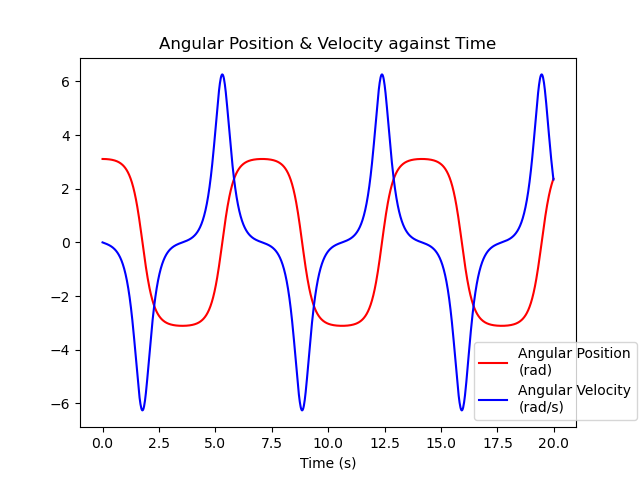

Text(0.5, 0, 'Time (s)')

In [5]:
# gets the soln from Runge-Kutta function
# using the "f()" function already defined
rsol = RungeKutta2d(r,tpoints,f)

# plots angle vs. time & angular velocity vs. time on same graph
plt.figure()
plt.plot(tpoints,rsol[0], 'r-',label="Angular Position\n(rad)") # the first row of rsol
plt.plot(tpoints,rsol[1], 'b-',label="Angular Velocity\n(rad/s)") # the second row of rsol
plt.legend(loc="upper left", bbox_to_anchor=(0.78, 0.25)) # legend placed to not overlap data
plt.title("Angular Position & Velocity against Time")
plt.xlabel("Time (s)")

The code cell above is used to get the solutions from the 4th order Runge-Kutta function that uses the predefined function "f()" and then to plot the solutions against time. Plotting the 1st element of the solution against time gives the angular position against time for the pendulum. Plotting the 2nd element of the solution against time gives the angular velocity against time for the pendulum.

From the graph you can see that the pendulum starts at a horizontal position and oscillates with a period of about 7 seconds. The gradient of the angular velocity line gives the angular acceleration and by looking at how the gradient of the lines compared to the angular position, it is clear to see that the angular acceleration is always pointing towards to centre of oscillation (the lowest height of bob). Also the gradient of the angular position line is the angular velocity line, by inspection.

The equilibrium position of the pendulum (lowest height) is when the angular velocity reaches a peak. This is because the pendulum is initially released from rest and the angular velocity increases as the pendulum accelerates towards the equilibrium position. At the equilibrium position, the angular velocity is maximum and angular acceleration is zero, as indicated by the sharp peaks of the angular velocity plot. After the peaks the angular acceleration changes direction and goes against the direction of the angular velocity as shown by the change in sign of the gradient on either side of the peak, this causes the angular velocity to decrease again.

## $ 2^{nd} $ Function (Small Angle Approximation) ##

In [6]:
# definition of 1st order equations to solve non-linear pendulum
# for small angle approximation
def f1(r,t):
    '''Definition of the vector function to be solved for bob on string
    using the small angle approximation, sin(θ)≈θ
    Inputs:
    - r = (a vector of θ (r[0]) and ω (r[1]))
    - t = time point - not explicitly used in this particular function, but required by the form of
    our general Runge Kutta function (i.e. essentially a dummy variable in this case)
    Outputs:
    - an array containing the angular velocity and angular acceleration of the pendulum'''
    
    theta = r[0] # 1st element of r represents the angle of the bob in RADIANS (rad)
    omega = r[1] # 2nd element of r represents the angular velocity of the bob in RADIANS/SECOND (rads^-1)
    f_theta = omega # dθ/dt is angular velocity in RADIANS/SECOND (rads^-1)
    f_omega = -(g/L)*(theta) # dω/dt is the angular acceleration in RADIANS/SECOND^2 (rads^-2)
    return np.array([f_theta,f_omega], float) # convert f_theta and f_omega to an array form

In the code cell above I have defined a 2nd function that is almost the exact same as the 1st function, except this new function accounts for the small angle approximation.

## Plotting $ 2^{nd} $ Function (Small Angle Approximation) ##

<IPython.core.display.Javascript object>


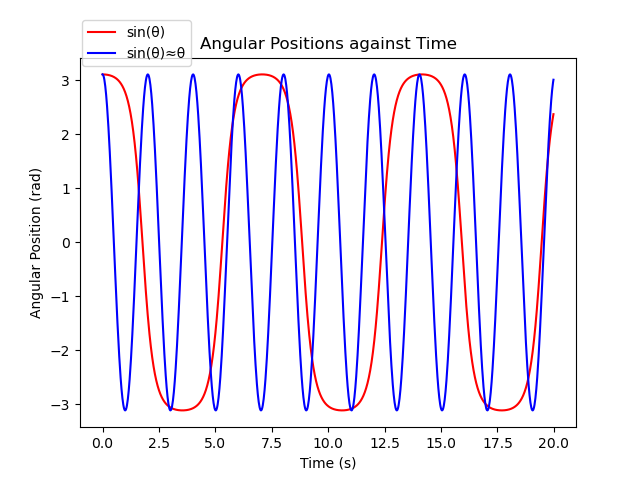

<IPython.core.display.Javascript object>


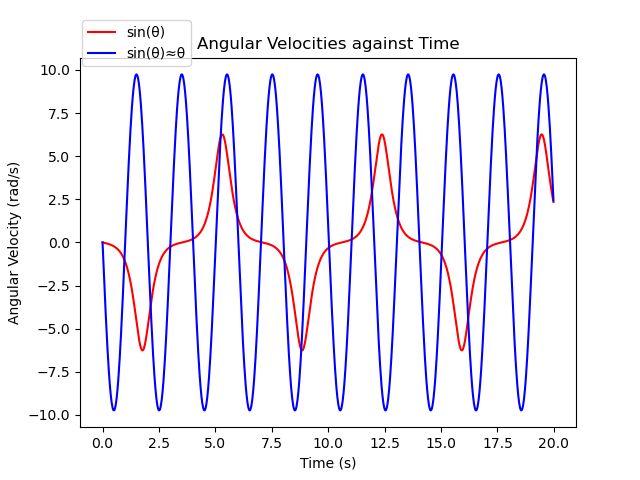

In [7]:
# gets the soln from Runge-Kutta function
# using the "f1()" function already defined
rsol1 = RungeKutta2d(r,tpoints,f1)

# plots angular positions vs. time
# including small angle approximation
plt.figure()
plt.plot(tpoints,rsol[0], 'r-',label="sin(θ)") # the 1st row of rsol
plt.plot(tpoints,rsol1[0], 'b-',label="sin(θ)≈θ") # the 1st row of rsol1
plt.legend(loc="upper left", bbox_to_anchor=(-0.01, 1.12)) # legend placed to not overlap data
plt.title("Angular Positions against Time")
plt.xlabel("Time (s)")
plt.ylabel("Angular Position (rad)");

# plots angular velocities vs. time
# including small angle approximation
plt.figure()
plt.plot(tpoints,rsol[1], 'r-',label="sin(θ)") # the 2nd row of rsol
plt.plot(tpoints,rsol1[1], 'b-',label="sin(θ)≈θ") # the 2nd row of rsol1
plt.legend(loc="upper left", bbox_to_anchor=(-0.01, 1.12)) # legend placed to not overlap data
plt.title("Angular Velocities against Time")
plt.xlabel("Time (s)")
plt.ylabel("Angular Velocity (rad/s)");

In the code cell above I have plotted the angular position against time for the ordinary function and the function with the small angle approximation, in addition to plotting the angular velocity against time for the ordinary function and the function with the small angle approximation.

Since the small angle approximation is applied for all angles, the graph of angular position shows that the period of the pendulum is greatly reduced as if the pendulum is being driven by a force. This is because the time period of a pendulum is dependent only on the length of the pendulum, L, and the gravitational field strength, g. Therefore the small angle approximation can only be used when sin(θ)≈θ, otherwise the physics doesn't make sense, since the period of the pendulum is affected by factors other than length of the pendulum and gravitational field strength.

## $ 3^{rd} $ Function (Damped Oscillations) ##

To make the pendulum even more realistic, we include a damping term. We define a damping coefficient $c$, and take into account the mass of the bob. The expression for the angular acceleration then becomes
$$
\frac{d \omega}{dt}  = -\frac{g}{L}\sin(\theta)  - \frac{c \omega}{M L^2}
$$

In [8]:
c = 0.01 # damping coefficient
m = 0.1 # mass of bob in KILOGRAMS (kg)

# definition of 1st order equations to solve non-linear pendulum
# including damping term
def f2(r,t):
    '''Definition of the vector function to be solved for bob on string
    using the damping term with coefficient, c, included.
    Inputs:
    - r = (a vector of θ (r[0]) and ω (r[1]))
    - t = time point - not explicitly used in this particular function, but required by the form of
    our general Runge Kutta function (i.e. essentially a dummy variable in this case)
    Outputs:
    - an array containing the angular velocity and angular acceleration of the pendulum'''
    
    theta = r[0] # 1st element of r represents the angle of the bob in RADIANS (rad)
    omega = r[1] # 2nd element of r represents the angular velocity of the bob in RADIANS/SECOND (rads^-1)
    f_theta = omega # dθ/dt is angular velocity in RADIANS/SECOND (rads^-1)
    # line below includes damping term
    f_omega = -(g/L)*np.sin(theta) - (c*omega)/(m*L**2) # dω/dt is the angular acceleration in RADIANS/SECOND^2 (rads^-2)
    return np.array([f_theta,f_omega], float) # convert f_theta and f_omega to an array form

In the code cell above I have added 2 new constants: c, the damping coefficient, and m, the mass of the pendulum bob. Furthermore I have defined a new function in which I have used the same structure and contents as the 1st function, except in this function the damping term has been included on the 2nd to last line of the code.

## Plotting $ 3^{rd} $ Function (Damped Oscillations) ##

<IPython.core.display.Javascript object>


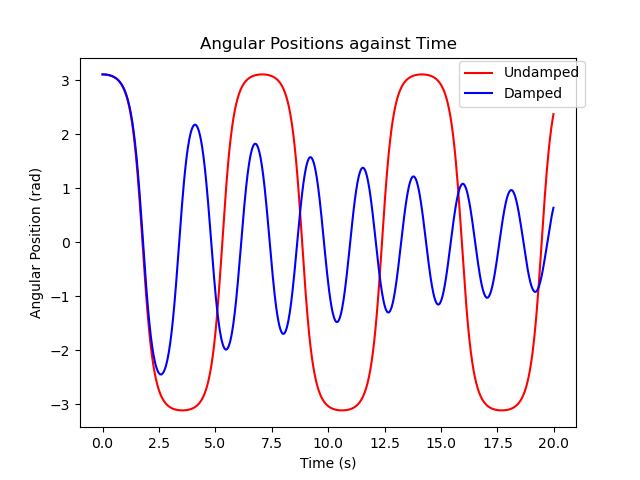

<IPython.core.display.Javascript object>


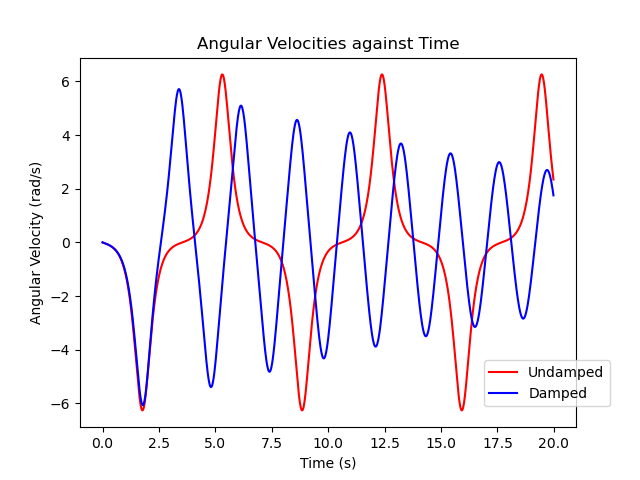

In [9]:
# gets the soln from Runge-Kutta function
# using the "f2()" function already defined
rsol2 = RungeKutta2d(r,tpoints,f2)

# plots angular positions vs. time
# including the damping term
plt.figure()
plt.plot(tpoints,rsol[0], 'r-',label="Undamped") # the 1st row of rsol
plt.plot(tpoints,rsol2[0], 'b-',label="Damped") # the 1st row of rsol2
plt.legend(loc="upper left", bbox_to_anchor=(0.75, 1.01)) # legend placed to not overlap data
plt.title("Angular Positions against Time")
plt.xlabel("Time (s)")
plt.ylabel("Angular Position (rad)");

# plots angular velocities vs. time
# including the damping term
plt.figure()
plt.plot(tpoints,rsol[1], 'r-',label="Undamped") # the 1st row of rsol
plt.plot(tpoints,rsol2[1], 'b-',label="Damped") # the 1st row of rsol2
plt.legend(loc="upper left", bbox_to_anchor=(0.8, 0.2)) # legend placed to not overlap data
plt.title("Angular Velocities against Time")
plt.xlabel("Time (s)")
plt.ylabel("Angular Velocity (rad/s)");

In the code cell above I have plotted 2 graphs. The 1st graph is of angular positions against time for both the undamped and damped pendulums, and the 2nd graph is of angular velocities against time for both the undamped and damped pendulums.

As you can see from the graph, the amplitude of the angular position of the damped pendulum decreases with time, as expected, since the energy of the pendulum decreases due to frictional resistance. This could come in the form of air resistance acting on the pendulum bob and string, or due to friction between the string and the point at which the string is attached to the wall/ceiling. It could also be due to water resistance if the pendulum is underwater, however in this case, that can be ruled out as there would be much more damping, and hence energy lost, if the pendulum was underwater meaning a higher damping coefficient (hypothetical).

From the angular velocity graph, it is clear to see that the peak angular velocity of the damped pendulum also decreases with time. This further supports that the damped pendulum is losing energy to its surroundings, causing the pendulum to slow down gradually.

From the graphs, it is clear to see that the time period also decreases. Due to the damping factor, the time period is no longer only affected by the length of the pendulum and the gravitational field strength.

## Animation ##

In [ ]:
from vpython import sphere, cylinder, color, rate, vector

### Animate the solution

# first set up the objects:
pivot = vector(0,0,0) # pivot point at centre of display

### For the undamped system:
# the rigid rod connecting the bob to the pivot point...
rod = cylinder(pos=pivot, axis = vector(L*np.sin(theta_i),-L*np.cos(theta_i),0), 
                      radius = 0.01, color=color.green)
# ...and the bob.
bob = sphere(pos=vector(L*np.sin(theta_i),-L*np.cos(theta_i),0), 
                      radius = 0.1, color=color.blue)


### For the damped system:
# the rigid rod connecting the bob to the pivot point...
rod_d = cylinder(pos=pivot, axis = vector(L*np.sin(theta_i),-L*np.cos(theta_i),0), 
                      radius = 0.01, color=color.green, opacity = 0.5)
# ...and the bob.
bob_d = sphere(pos=vector(L*np.sin(theta_i),-L*np.cos(theta_i),0), 
                      radius = 0.1, color=color.red, opacity = 0.5)

# Loop over the solution already calculated    
for i in range(0,N):
    
    ## undamped system:
    angle = rsol[0,i] 
    #  change the axis of the bob
    rod.axis = vector(L*np.sin(angle), -L*np.cos(angle),0)
    #update the position of the bob:
    bob.pos = vector(L*np.sin(angle),-L*np.cos(angle),0)
    
    ## damped system:
    angle1 = rsol2[0,i]
    #  change the axis of the damped bob
    rod_d.axis = vector(L*np.sin(angle1), -L*np.cos(angle1),0)
    #update the position of the damped bob:
    bob_d.pos = vector(L*np.sin(angle1),-L*np.cos(angle1),0)
    
    rate(50) # max number of screen updates per second

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In the code cell above I have used the code provided to create an animation of the undamped pendulum and the damped pendulum. The undamped pendulum is represented by the dark blue sphere, whereas the damped pendulum is represented by the translucent red sphere. As you can see by running the animation, the animation matches the results of the graphs shown and explained previously and runs as expected.

Completed!